In [36]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv('/content/income.csv')

In [4]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<Axes: xlabel='Age', ylabel='Income($)'>

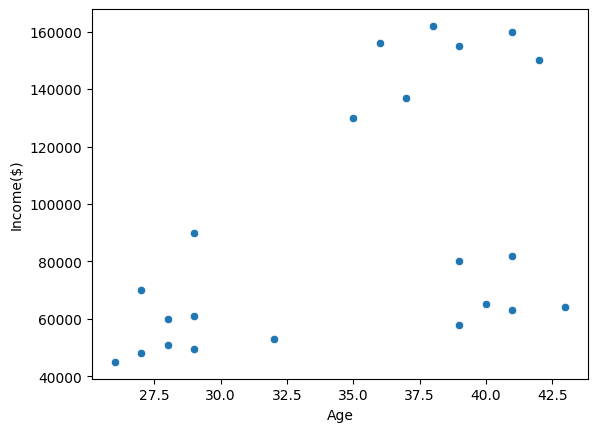

In [8]:
sns.scatterplot(data=df,x='Age',y='Income($)')

In [14]:
scaler=MinMaxScaler()
df[['Age','Income($)']]=scaler.fit_transform(df[['Age','Income($)']])

In [15]:
df.head()

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436


In [21]:
Km=KMeans(n_clusters=3)
y_predicted=Km.fit_predict(df[['Age','Income($)']])
df['cluster']=y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
df.head()


,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [27]:
Km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

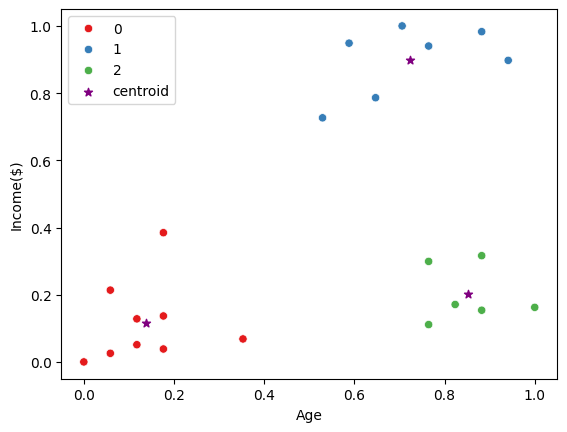

In [39]:
sns.scatterplot(x='Age',y='Income($)',data=df,hue='cluster',palette='Set1')
plt.scatter(Km.cluster_centers_[:,0],Km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [43]:
#Using Elbow Method to find optimum Kvalue
sse = []
k_rng = range(1,10)
for k in k_rng:
    Km = KMeans(n_clusters=k)
    Km.fit(df[['Age','Income($)']])
    sse.append(Km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'SSE')

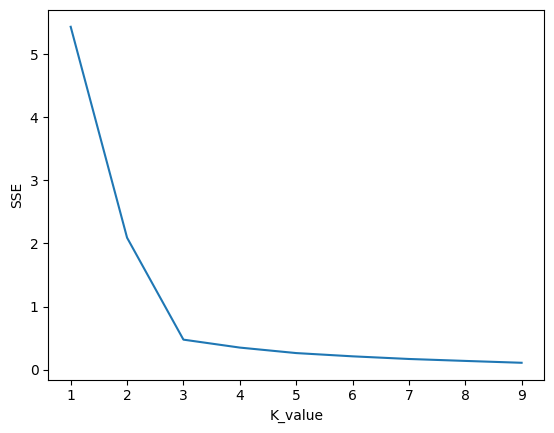

In [46]:
sns.lineplot(x=k_rng,y=sse)
plt.xlabel('K_value')
plt.ylabel('SSE')